In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import IPython.display as ipd
import sklearn

In [6]:
# Load the WAV file
audio_file = "./101_mono.wav"

y, sr = librosa.load(audio_file, sr=None)  # sr=None to preserve the original sampling rate

#Display audio
ipd.Audio(audio_file)

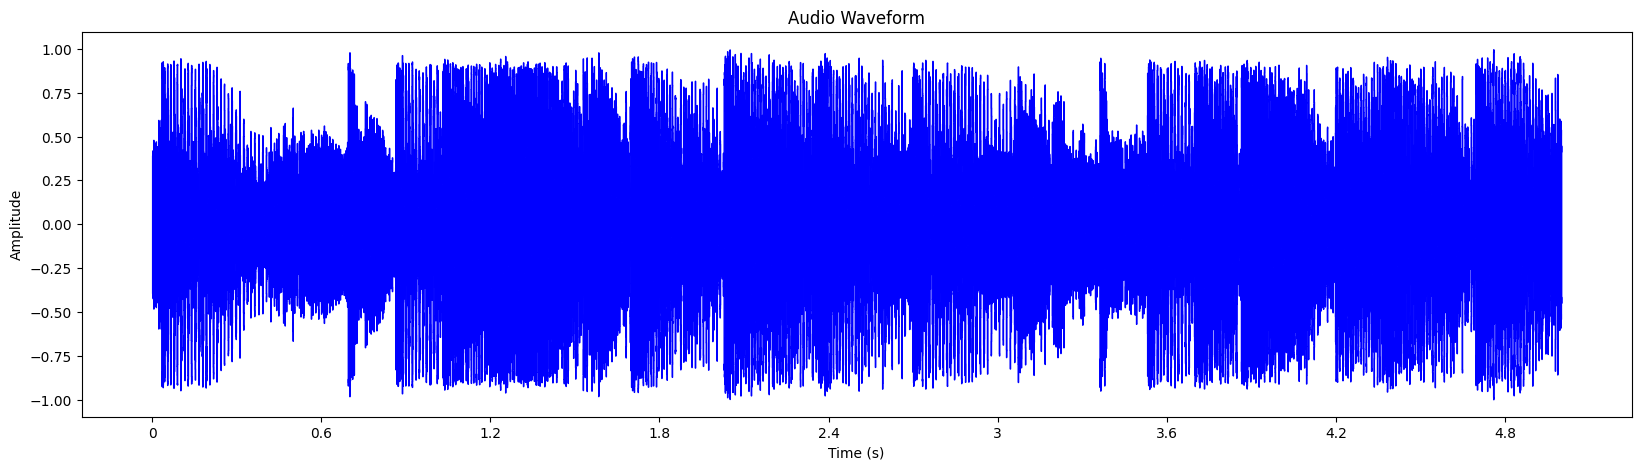

In [12]:
#Show audio waveform
plt.figure(figsize=(20, 5))
librosa.display.waveshow(y, sr=sr, color="blue")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Audio Waveform')
plt.show()

In [8]:
# Extract MFCCs
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)  # You can adjust the number of MFCC coefficients (n_mfcc)

# Save MFCCs as a CSV file
mfccs_df = pd.DataFrame(mfccs)
mfccs_df.to_csv("mfccs.csv", index=False)

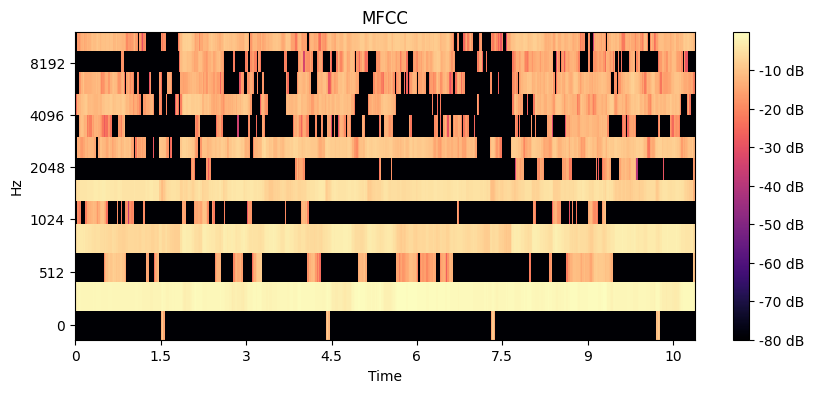

In [9]:
# Visualize the MFCCs
plt.figure(figsize=(10, 4))

librosa.display.specshow(librosa.power_to_db(mfccs, ref=np.max), y_axis='mel', x_axis='time')

plt.colorbar(format='%+2.0f dB')

plt.title('MFCC')

plt.show()